In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

# Load Data

In [31]:
data = pd.read_csv('./data/ukraine_stream_big.csv', delimiter=',', low_memory=False)
data.set_index('id')

,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,text,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,matching_rules
id,,,,,,,,,,,,,,,,,,,,,
1573014137533235201,1573014137533235201,NaN,1.572982e+18,NaN,1387493777955336197,NaN,3.279271e+07,NaN,2022-09-22T18:19:30.000Z,Update: Lavrov: Countries that support Ukraine...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}]"
1573014137688723456,1572585751652757507,1.572586e+18,NaN,NaN,718781298,1.621950e+07,NaN,NaN,2022-09-22T18:19:30.000Z,@charlesadler UKR had 3-4 suited connectors a...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."
1573014135813595137,1573003265150795776,1.573003e+18,NaN,NaN,1516126340008878082,1.516039e+18,NaN,NaN,2022-09-22T18:19:29.000Z,@Anonymous9775 Keiner wird durchmaschieren htt...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."
1573014135776104448,1573014135776104448,NaN,1.573007e+18,NaN,702412861042196480,NaN,2.744316e+08,NaN,2022-09-22T18:19:29.000Z,The @OSCE #MoscowMechanism report shows that #...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745850035802112"", ""tag"": """"}]"
1573014138183352323,1573014138183352323,NaN,1.572972e+18,NaN,41108484,NaN,8.065331e+07,NaN,2022-09-22T18:19:30.000Z,🇷🇺 IT expert Viktor Burgeev (32) with zero mil...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573086985706786817,1573086985706786817,NaN,NaN,NaN,838619254530408449,NaN,NaN,NaN,2022-09-22T23:08:58.000Z,https://t.co/GgwNt0msD1,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T23:09:01+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745924216254464"", ""tag"": """"}, {""i..."
1573086982737395712,1572763455412633600,1.572763e+18,NaN,NaN,162518255,1.403357e+18,NaN,NaN,2022-09-22T23:08:57.000Z,"@smashbaals ""Stood their ground"". Hate to tel...",...,NaN,NaN,NaN,NaN,NaN,2022-09-22T23:09:02+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745850035802112"", ""tag"": """"}]"
1573086984821768193,1573086984821768193,NaN,1.572985e+18,NaN,1085683407844265984,NaN,3.301957e+09,NaN,2022-09-22T23:08:58.000Z,Mogg couldn't resist the outrageous lie that P...,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T23:09:02+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745924216254464"", ""tag"": """"}]"


# Exploratory Data Analysis (EDA)

In [32]:
data.head()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,matching_rules
0,1573014137533235201,1573014137533235201,NaN,1.572982e+18,NaN,1387493777955336197,NaN,32792712.0,NaN,2022-09-22T18:19:30.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}]"
1,1573014137688723456,1572585751652757507,1.572586e+18,NaN,NaN,718781298,1.621950e+07,NaN,NaN,2022-09-22T18:19:30.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:33+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."
2,1573014135813595137,1573003265150795776,1.573003e+18,NaN,NaN,1516126340008878082,1.516039e+18,NaN,NaN,2022-09-22T18:19:29.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."
3,1573014135776104448,1573014135776104448,NaN,1.573007e+18,NaN,702412861042196480,NaN,274431647.0,NaN,2022-09-22T18:19:29.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745850035802112"", ""tag"": """"}]"
4,1573014138183352323,1573014138183352323,NaN,1.572972e+18,NaN,41108484,NaN,80653307.0,NaN,2022-09-22T18:19:30.000Z,...,NaN,NaN,NaN,NaN,NaN,2022-09-22T18:19:34+00:00,https://api.twitter.com/2/tweets/search/stream...,2.11.3,NaN,"[{""id"": ""1572745861951819778"", ""tag"": """"}, {""i..."


In [33]:
data.describe()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,public_metrics.like_count,...,attachments.poll.id,author.id,author.pinned_tweet_id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.withheld.scope,author.withheld.copyright,Unnamed: 73
count,4.944730e+05,4.944730e+05,1.580020e+05,2.784710e+05,2.663300e+04,4.944730e+05,1.602590e+05,2.784670e+05,2.663300e+04,494473.000000,...,2.860000e+02,4.944730e+05,1.690960e+05,4.944730e+05,4.944730e+05,494473.000000,4.944730e+05,0.0,0.0,0.0
mean,1.573048e+18,1.572437e+18,1.571898e+18,1.572277e+18,1.569999e+18,7.465037e+17,5.395024e+17,5.448090e+17,4.729121e+17,1583.639829,...,1.572512e+18,7.465037e+17,1.421178e+18,9.004438e+03,1.573496e+03,57.673562,5.245461e+04,NaN,NaN,NaN
std,2.179486e+13,1.377869e+16,1.713641e+16,1.334642e+16,3.338001e+16,6.681442e+17,6.500239e+17,6.591961e+17,6.295083e+17,5364.679333,...,4.636113e+15,6.681442e+17,2.153276e+17,3.577419e+05,5.632454e+03,1350.976532,1.307514e+05,NaN,NaN,NaN
min,1.571541e+18,1.784982e+10,1.784982e+10,1.612633e+09,4.105758e+17,5.090000e+02,1.200000e+01,1.688000e+03,1.688000e+03,0.000000,...,1.517463e+18,5.090000e+02,1.769513e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN
25%,1.573030e+18,1.573017e+18,1.572907e+18,1.572870e+18,1.572859e+18,7.618130e+08,1.636144e+08,1.620634e+08,9.128616e+07,0.000000,...,1.572884e+18,7.618130e+08,1.368743e+18,5.900000e+01,1.490000e+02,0.000000,2.568000e+03,NaN,NaN,NaN
50%,1.573047e+18,1.573037e+18,1.573008e+18,1.572981e+18,1.572972e+18,9.168221e+17,2.487721e+09,2.758100e+09,1.911487e+09,7.000000,...,1.573001e+18,9.168221e+17,1.512672e+18,2.850000e+02,5.140000e+02,1.000000,1.208600e+04,NaN,NaN,NaN
75%,1.573064e+18,1.573058e+18,1.573038e+18,1.573025e+18,1.573023e+18,1.437537e+18,1.266035e+18,1.315830e+18,1.187836e+18,594.000000,...,1.573050e+18,1.437537e+18,1.561103e+18,1.171000e+03,1.639000e+03,7.000000,4.739400e+04,NaN,NaN,NaN
max,1.573087e+18,1.573087e+18,1.573087e+18,1.573087e+18,1.573087e+18,1.573086e+18,1.573072e+18,1.573072e+18,1.573072e+18,543504.000000,...,1.573086e+18,1.573086e+18,1.573086e+18,1.066032e+08,1.081764e+06,217345.000000,9.162539e+06,NaN,NaN,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494473 entries, 0 to 494472
Data columns (total 75 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     494473 non-null  int64  
 1   conversation_id                        494473 non-null  int64  
 2   referenced_tweets.replied_to.id        158002 non-null  float64
 3   referenced_tweets.retweeted.id         278471 non-null  float64
 4   referenced_tweets.quoted.id            26633 non-null   float64
 5   author_id                              494473 non-null  int64  
 6   in_reply_to_user_id                    160259 non-null  float64
 7   retweeted_user_id                      278467 non-null  float64
 8   quoted_user_id                         26633 non-null   float64
 9   created_at                             494473 non-null  object 
 10  text                                   494473 non-null  

494473 Tweets collected
The types of the columns are also not typed to what we want such as 4.time is object not datetime.
This means we need to type some of our data.


# Typing and Converting the Data

In [35]:
# convert the 'created_at' column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# sort by time
data.sort_values(by=['created_at'], ascending=True, inplace=True)

# Check the format of 'created_at' column
data.created_at.head()

378386   2022-09-18 16:44:51+00:00
378387   2022-09-18 16:46:22+00:00
378388   2022-09-18 16:49:31+00:00
378389   2022-09-18 16:50:30+00:00
378392   2022-09-18 16:51:39+00:00
Name: created_at, dtype: datetime64[ns, UTC]

As you can see the created_at column has now been put into a datetime format which is going to be useful for our further EDA

# Dropping columns
Redundant columns: retweet_date, retweet_id, user_id, user_rt, username, name, mentions, urls, photos, replies_count, retweets_count, likes_count, hashtags, cashtags, link, retweet, quote_url, video, thumbnail, source, user_rt_id, user_rt, retweet_id, translate, trans_src, trans_dest, conversation_id, date, time, timezone,

In [37]:
columns_to_be_kept = [ 'id',
                       # 'conversation_id',
       # 'referenced_tweets.replied_to.id',
       #  'referenced_tweets.retweeted.id',
       #     'referenced_tweets.quoted.id',
       #                       'author_id',
       #             'in_reply_to_user_id',
       #               'retweeted_user_id',
       #                  'quoted_user_id',
                            'created_at',
                          'text',
                                  'lang',
          #                       'source',
          #    'public_metrics.like_count',
          #   'public_metrics.quote_count',
          #   'public_metrics.reply_count',
          # 'public_metrics.retweet_count',
          #               'reply_settings',
          #           'possibly_sensitive',
          #               'withheld.scope',
          #           'withheld.copyright',
          #                 'withheld.country_codes',
          #         'entities.annotations',
          #            'entities.cashtags',
                     'entities.hashtags',
                     'entities.mentions',
                         # 'entities.urls',
                   # 'context_annotations',
                   #   'attachments.media',
                # 'attachments.media_keys',
     # 'attachments.poll.duration_minutes',
     #     'attachments.poll.end_datetime',
     #                      'attachments.poll.id',
     #          'attachments.poll.options',
     #    'attachments.poll.voting_status',
     #              'attachments.poll_ids',
     #                         'author.id',
     #                 'author.created_at',
     #                   'author.username',
     #                       'author.name',
     #                'author.description',
  # 'author.entities.description.cashtags',
  # 'author.entities.description.hashtags',
# 'author.entities.description.mentions',
#       'author.entities.description.urls',
#               'author.entities.url.urls',
                       'author.location',
                # 'author.pinned_tweet_id',
              # 'author.profile_image_url',
                      'author.protected',
 # 'author.public_metrics.followers_count',
 # 'author.public_metrics.following_count',
 #    'author.public_metrics.listed_count',
 #     'author.public_metrics.tweet_count',
 #                            'author.url',
 #                       'author.verified',
 #                 'author.withheld.scope',
 #             'author.withheld.copyright',
 #         'author.withheld.country_codes',
           'geo.coordinates.coordinates',
                  'geo.coordinates.type',
                           'geo.country',
                          'geo.country_code',
                         'geo.full_name',
                          'geo.geo.bbox',
                          'geo.geo.type',
                                'geo.id',
                              'geo.name',
                          'geo.place_id',
                        'geo.place_type',
                  # '__twarc.retrieved_at',
                  #          '__twarc.url',
                  #      '__twarc.version',
                          ]


In [38]:
drop_columns = [ele for ele in list(data.columns.array) if ele not in columns_to_be_kept]

data = data.drop(columns=drop_columns)

Removing useless columns that do not help the NLP cause for our client. Except if we were to analyse photos and video would the links be useful but for this assessment we will not be doing that, just pure NLP.

# Further EDA

### Adding hour column

In [39]:
eda = data
eda['hour'] = eda['created_at'].dt.strftime("%d/%b/%Y %H")
eda['hour'] = pd.to_datetime(eda['hour'])
eda['tweet_val'] = 1
eda = eda.sort_values(by=['hour'], ascending=True)

In [40]:
eda.head(30)

,id,created_at,text,lang,entities.hashtags,entities.mentions,author.location,author.protected,geo.coordinates.coordinates,geo.coordinates.type,...,geo.country_code,geo.full_name,geo.geo.bbox,geo.geo.type,geo.id,geo.name,geo.place_id,geo.place_type,hour,tweet_val
378386,1571540767037849606,2022-09-18 16:44:51+00:00,"There are costs to saying so, but if I were wr...",en,NaN,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378387,1571541150686760960,2022-09-18 16:46:22+00:00,#Ukraine: For the first time ever the most adv...,en,"[{""start"": 0, ""end"": 8, ""tag"": ""Ukraine""}, {""s...",NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378388,1571541941275488258,2022-09-18 16:49:31+00:00,If this doesn’t make your heart melt something...,en,NaN,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378389,1571542190182092801,2022-09-18 16:50:30+00:00,@EStratez @anniefofani ‘This’ started as a Was...,en,NaN,"[{""start"": 0, ""end"": 9, ""username"": ""EStratez""...",NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378392,1571542477554814979,2022-09-18 16:51:39+00:00,@SmnWeekly From @MalcolmNance @michaelcrowley ...,en,NaN,"[{""start"": 0, ""end"": 10, ""username"": ""SmnWeekl...",United States Minor Outlying Islands,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378372,1571543968978210817,2022-09-18 16:57:34+00:00,@PRaporlar Bayağı artıyor metropol un selvinin...,tr,NaN,"[{""start"": 0, ""end"": 10, ""username"": ""PRaporla...",amsterdam,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 16:00:00,1
378382,1571548079865884672,2022-09-18 17:13:54+00:00,"President #Putin: It turns out that, according...",en,"[{""start"": 10, ""end"": 16, ""tag"": ""Putin""}, {""s...","[{""start"": 50, ""end"": 64, ""username"": ""EU_Comm...",Rio de Janeiro,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 17:00:00,1
378408,1571547603732496386,2022-09-18 17:12:01+00:00,@Gerashchenko_en @amnesty After their travesty...,en,NaN,"[{""start"": 0, ""end"": 16, ""username"": ""Gerashch...",Canada,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 17:00:00,1
378409,1571547541577281536,2022-09-18 17:11:46+00:00,On #SundayTODAY: @MeaganNBC has this week’s #S...,en,"[{""start"": 3, ""end"": 15, ""tag"": ""SundayTODAY""}...","[{""start"": 17, ""end"": 27, ""username"": ""MeaganN...",NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 17:00:00,1
378394,1571546504581779457,2022-09-18 17:07:39+00:00,Remember: when we argue about the collective r...,en,NaN,"[{""start"": 165, ""end"": 177, ""username"": ""Hroma...",NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-18 17:00:00,1


In [41]:
eda.describe()

,id,tweet_val
count,4.944730e+05,494473.0
mean,1.573048e+18,1.0
std,2.179486e+13,0.0
min,1.571541e+18,1.0
25%,1.573030e+18,1.0
50%,1.573047e+18,1.0
75%,1.573064e+18,1.0
max,1.573087e+18,1.0


### Tweets Overtime (Hourly)

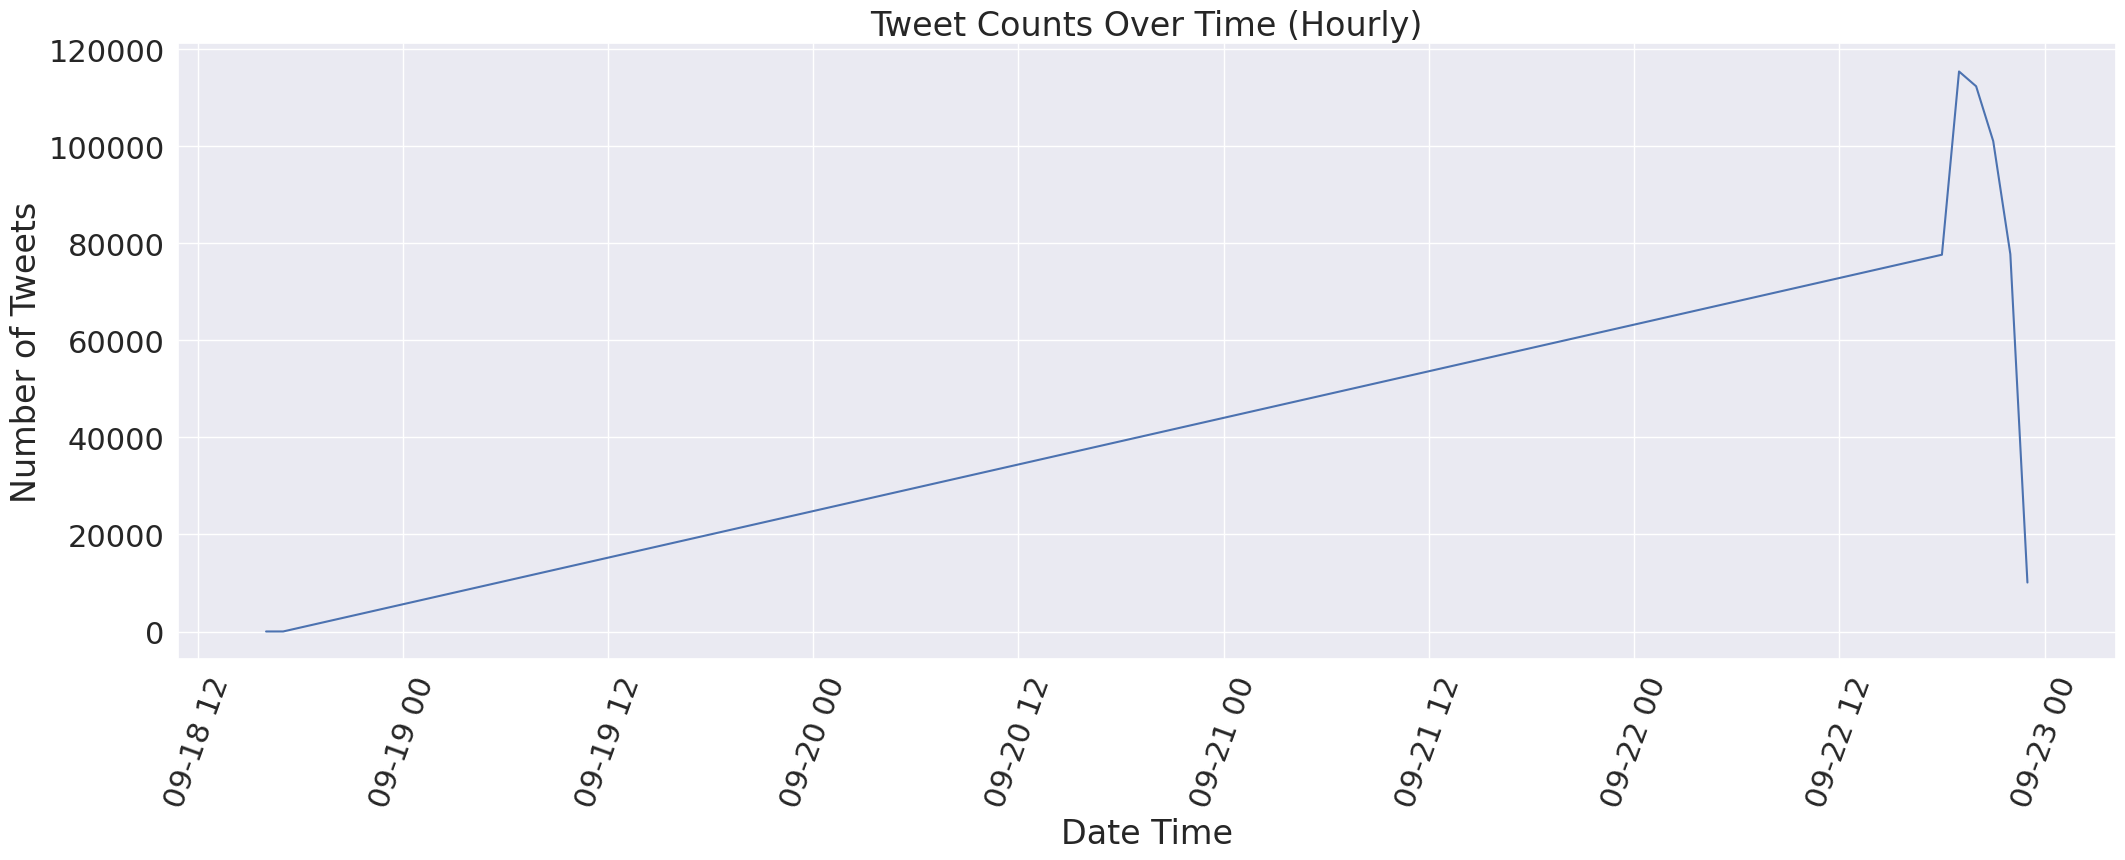

In [42]:
fig, ax = plt.subplots(figsize=(25,8))
plt.xticks(rotation=70)
sb.set(font_scale=2)
data_viz = eda.groupby(['hour'], as_index=False)['tweet_val'].sum()
data_viz = data_viz.sort_values(by=['hour'], ascending=True)
ax2 = sb.lineplot(data=data_viz, x="hour", y="tweet_val")
ax2.set(title="Tweet Counts Over Time (Hourly)", xlabel="Date Time", ylabel="Number of Tweets")
plt.draw()

### Analysis of Language

#### Most common languages

[Text(0, 0, '330583'),
 Text(0, 0, '33252'),
 Text(0, 0, '28161'),
 Text(0, 0, '26249'),
 Text(0, 0, '22490'),
 Text(0, 0, '10563'),
 Text(0, 0, '6206'),
 Text(0, 0, '5918'),
 Text(0, 0, '5077'),
 Text(0, 0, '3583'),
 Text(0, 0, '2328'),
 Text(0, 0, '2176'),
 Text(0, 0, '1914'),
 Text(0, 0, '1700'),
 Text(0, 0, '1309'),
 Text(0, 0, '1108'),
 Text(0, 0, '1089'),
 Text(0, 0, '945'),
 Text(0, 0, '908'),
 Text(0, 0, '891'),
 Text(0, 0, '860'),
 Text(0, 0, '705'),
 Text(0, 0, '646'),
 Text(0, 0, '630'),
 Text(0, 0, '621'),
 Text(0, 0, '600'),
 Text(0, 0, '559'),
 Text(0, 0, '398'),
 Text(0, 0, '394'),
 Text(0, 0, '386'),
 Text(0, 0, '240'),
 Text(0, 0, '225'),
 Text(0, 0, '210'),
 Text(0, 0, '194'),
 Text(0, 0, '173'),
 Text(0, 0, '171'),
 Text(0, 0, '157'),
 Text(0, 0, '117'),
 Text(0, 0, '115'),
 Text(0, 0, '103'),
 Text(0, 0, '99'),
 Text(0, 0, '75'),
 Text(0, 0, '71'),
 Text(0, 0, '46'),
 Text(0, 0, '45'),
 Text(0, 0, '44'),
 Text(0, 0, '44'),
 Text(0, 0, '24'),
 Text(0, 0, '17'),
 Text

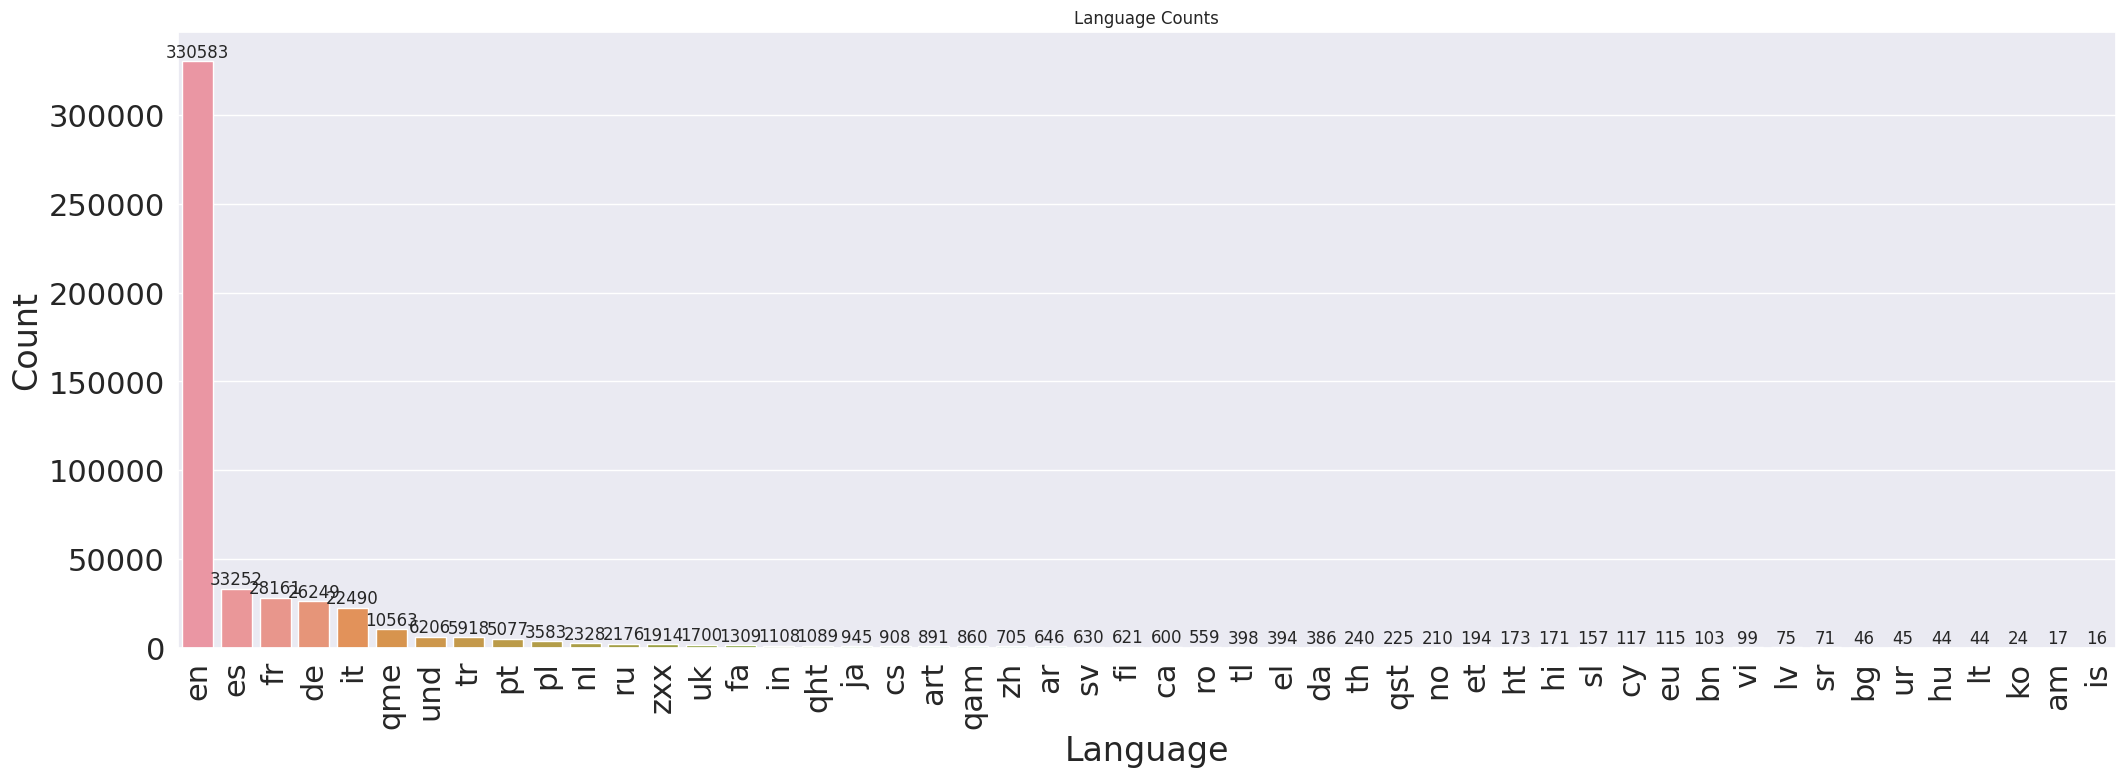

In [43]:
languagesTermFreqCounter = Counter()
languagesTermFreqCounter.update(eda["lang"])
filtered_words_df = pd.DataFrame(data=languagesTermFreqCounter.most_common(50), columns =['Language', 'Count'])
fig, ax = plt.subplots(figsize=(25,8))
plt.xticks(rotation=90)
sb.set(font_scale=1)
ax2 = sb.barplot(data=filtered_words_df, x="Language", y="Count", ax=ax)
ax2.set(title="Language Counts")
ax2.bar_label(ax2.containers[0])

#### Plotting most common languages counts overtime

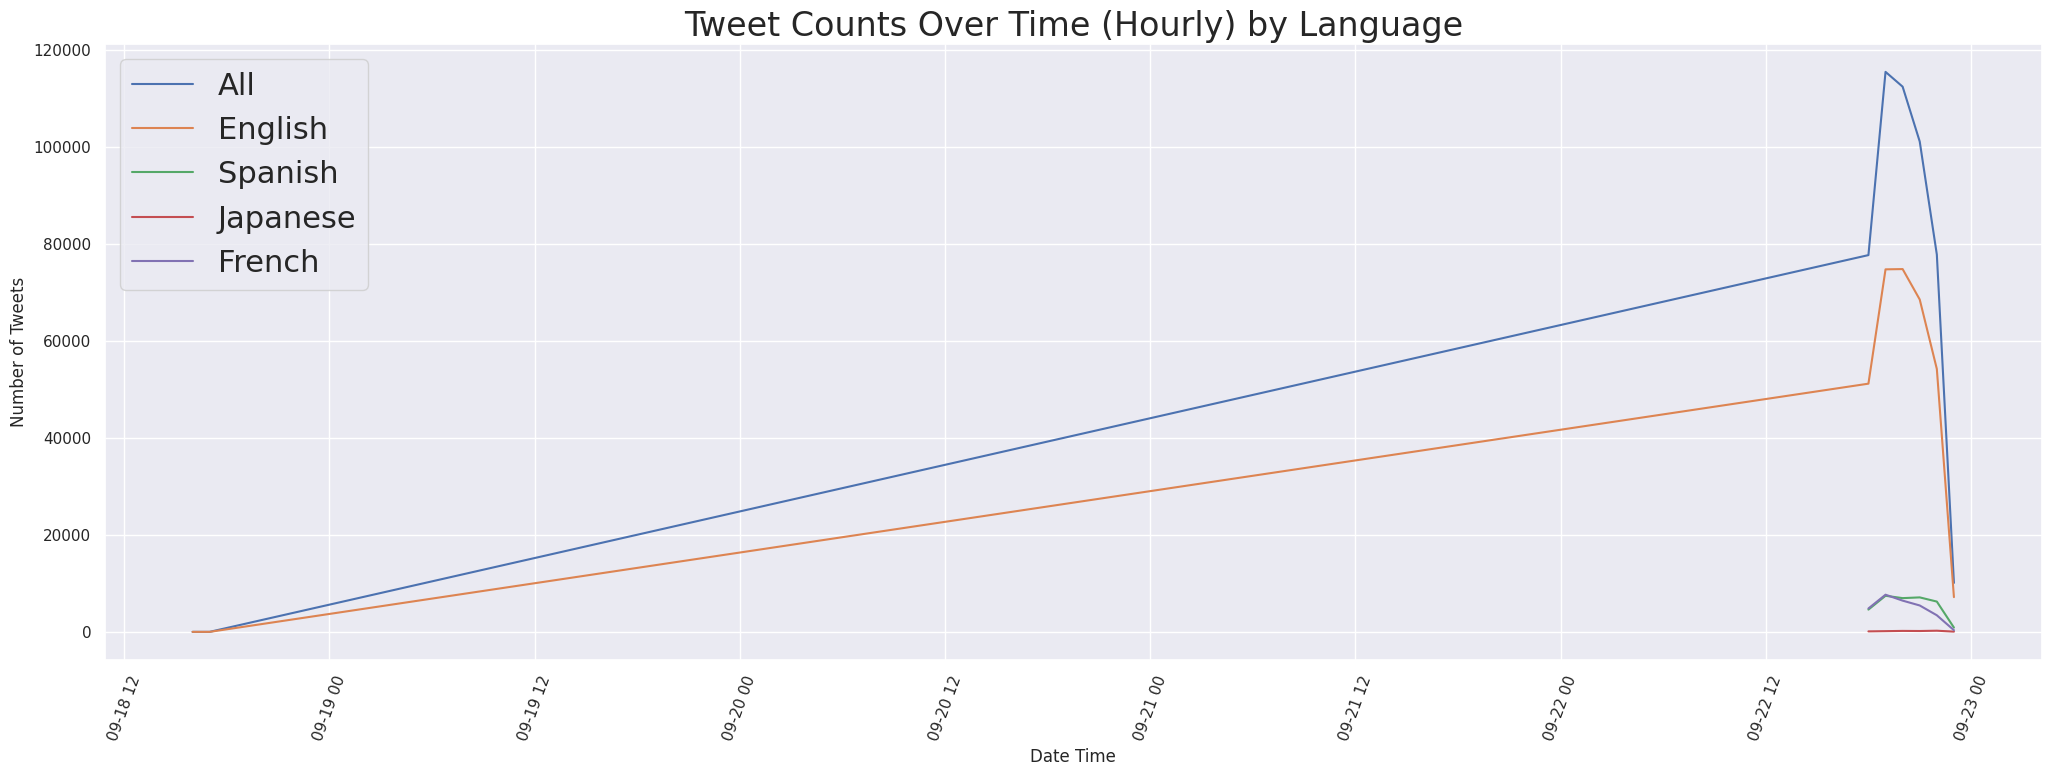

In [44]:
fig, ax = plt.subplots(figsize=(25,8))
plt.xticks(rotation=70)
sb.set(font_scale=2)
for grp in [eda, eda[eda.lang == "en"], eda[eda.lang == "es"], eda[eda.lang == "ja"], eda[eda.lang == "fr"]]:
    data_viz = grp.groupby(['hour'], as_index=False)['tweet_val'].sum()
    data_viz = data_viz.sort_values(by=['hour'], ascending=True)
    ax = sb.lineplot(data=data_viz, x="hour", y="tweet_val")
ax.set(title="Tweet Counts Over Time (Hourly) by Language", xlabel="Date Time", ylabel="Number of Tweets")
plt.legend(["All", "English", "Spanish", "Japanese", "French"], loc='best')
plt.show()